# 0 - Chargement de librairies

In [2]:
import os
import numpy as np
import pandas as pd
import math
import sys
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats, Image
path = "C:/Users/youssef/Desktop/"
os.chdir(path)

# statistical modeling libraries
import statsmodels.formula.api as smf
import scipy.stats as scs
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

# 1 - Quelques Bases

Une série temporelle ou série chronologique, est une suite de valeurs numériques représentant l’évolution d’une quantité au cours du temps

## 1-1 Processus de génération de données

Une note une série temporelle $\{y_t\}_{t=1}^{T}$. On suppose que cette série est la réalisation d'un processus non observale 

## 1-2 Autocorrélation

Autocorrélation décrit la covariance entre deux valeurs d'un même processus (à un paramètre multiplicatif près)
$$\gamma(t,s) = Cov(y_t,y_s) = E[(y_t-\mu_t)(y_s-\mu_s)]$$

C'est un indicateur qui montre comment les observations d'une série temporelle sont liées entre elles.

## 1-3 Concept de stationnarité

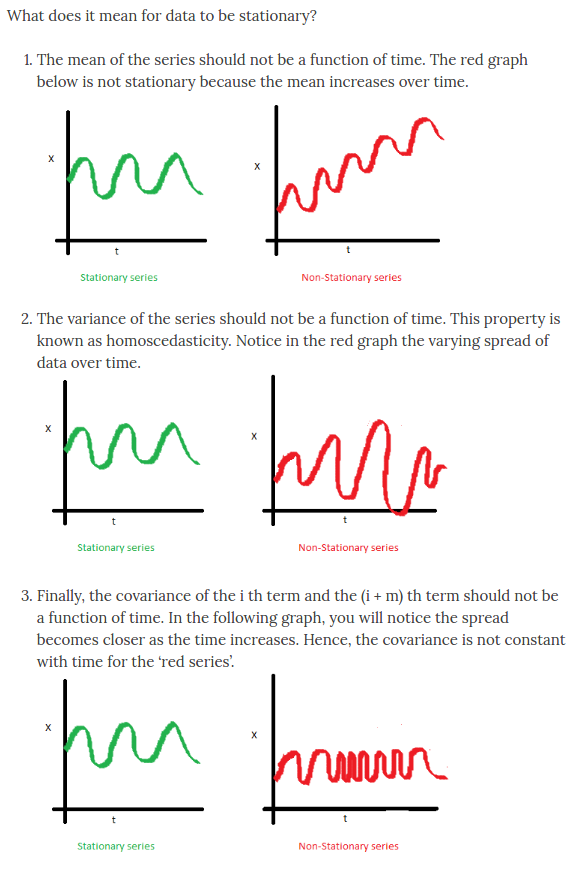

In [38]:
Image(filename=('stationarity.png'))

Un processus $\{y_t\}_{t=1}^{T}$ est dit stationnaire si 
$$E(y_t) = \mu$$
$$V(y_t) = \sigma^2$$
$$\gamma(y_t,y_s) = \gamma(t-s)$$


## 1-4 ACF & PACF 

La fonction d'autocorrélation (ACF) et la fonction d'autocorélation partielle (PACF) permettent d'examiner la structure de dépendance des séries temporelles.

La fonction ACF est fonction du décalage temporel de la série temporelle elle-même. De manière informelle, c’est la similitude entre les observations en fonction du décalage temporel qui les sépare. Le PACF est la corrélation conditionnelle entre deux variables sous l'hypothèse que les effets de tous les décalages précédents sur la série temporelle sont connus.

** --> fonction pour visualiser une série, en plus de quelques statistiques **

In [70]:
def ts_plot(y, lags=None, title=''):
    '''
    Calculate acf, pacf, histogram, and qq plot for a given time series
    '''
    # if time series is not a Series object, make it so
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    # initialize figure and axes
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    #plt.legend(loc='best')
    ts_ax.set_title(title);
    
    # acf and pacf
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('Normal QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    plt.show()
    return

## 1-5 Bruit Blanc

$$x_t = \epsilon_t$$
tel que : 
$\epsilon_t$ suit une loi $(0,\sigma^2)$

$E[\epsilon_t\epsilon_s] = 0$ pour s différent de t

In [3]:
np.random.seed(1)
 
# simulate discrete Gaussian white noise N(0, 1)
e = np.random.normal(size=1000)
#e = np.random.standard_t(size=1000, df=1)

#visualiser la série


Les graphiques ci-dessus ressemblent à la structure souhaitée d'une série chronologique d'erreurs. 

Il n’existe pas de pics dans les fichiers ACF et PACF indiquant une composante négligée. 

Les courbes QQ normal et Histogramme indiquent un comportement normal. 

Étant donné qu'une distribution normale est supposée pour la création de données, le processus s'appelle un processus de bruit blanc gaussien.

## 1-6 Processus de marche aléatoire 

$$x_t = x_{t-1} + \epsilon_t$$

avec $\epsilon_t$ un bruit blanc.

In [4]:
np.random.seed(2)
 
# parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
 
# simulate random walk
for t in range(T):
    x[t] = x[t-1] + e[t]
 
 #plot serie


Nous pouvons voir la ressemblance de ce processus de marche aléatoire avec les graphiques boursiers réels. 
Ceci est caractérisé par un ACF élevé pour toute longueur de décalage et un PACF élevé pour le premier décalage uniquement. 
Le tracé QQ normal et l'histogramme indiquent que la série n'est pas un bruit blanc.

##  1-7 Modèle autorégressif

$$x_t = \mu + \Sigma_{i=1}^{p}\phi_i x_{t-i} + \epsilon_t $$

In [5]:
np.random.seed(4)
 
# parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
phi = 0.3
 
# simulate AR(1)
for t in range(T):
    x[t] = phi * x[t-1] + e[t]
 
 # plot series


Pour le processus AR(1), nous remarquons un pic au premier décalage pour ACF et PACF, qui décroît immédiatement à zéro dans les deux parcelles. 

En outre, l'histogramme et les courbes QQ indiquent des résidus presque aléatoires.

Notez que la marche aléatoire introduite précédemment est un processus autorégressif de premier ordre, et il n'est pas stationnaire. 

Par contre $(x_t - x_{t-1})$ est stationnaire.

## 1-8 Modèle des moyennes mobiles

Le modèle de moyenne mobile MA(q) suppose que la série temporelle observée peut être représentée par une combinaison linéaire de termes d'erreur de bruit blanc. 
C'est la forme $$x_t = \epsilon_t + \Sigma_{i=1}^{q}\theta_i\epsilon_{t-i}$$

In [6]:
np.random.seed(4)
 
# parameter setting
T = 1000
e = np.random.normal(size=T)
x = np.zeros_like(e)
theta1 = 0.8
theta2 = - 1.4
 
# simulate MA(2)
for t in range(T):
    x[t] = e[t] + theta1 * e[t-1] + theta2 * e[t-2]
 
 # plot series

Pour le processus MA(2), nous notons un pic plus important pour le deuxième décalage dans les tracés ACF et PACF. 
Nous observons également que lorsque le pic apparaît dans le graphique PACF, il ne se désintègre pas immédiatement. 
Il prend plutôt quelques périodes pour se désintégrer.

# 2- Décomposition d'une série temporelle

L’idée de base de la décomposition des séries chronologiques est de décomposer les séries originales en plusieurs composants indépendants. 

En règle générale, les séries temporelles sont divisées en quatre composantes:

Tendance : orientation générale de la série (vers le haut ou vers le bas)

Saisonnalité : tendances hebdomadaires, mensuelles ou annuelles

Cycle : cycles économiques à long terme, ils interviennent généralement après 5 ou 7 ans

Bruit : reste irrégulier laissé après l'extraction des composants précédents

In [7]:
# load passenger data set and save to DataFrame
df = pd.read_csv('C:/Users/youssef/Desktop/passengers.csv', header=0, index_col=0, parse_dates=True, sep=';')
y = df['n_passengers']

# simple line plot
fig = plt.figure(figsize=(19, 7))
plt.plot(df)
plt.title('International Airline Passengers', fontsize=24)
plt.ylabel('Passengers')
plt.xlabel('Date')
plt.show()

" \n# simple line plot\nfig = plt.figure(figsize=(19, 7))\nplt.plot(df)\nplt.title('International Airline Passengers', fontsize=24)\nplt.ylabel('Passengers')\nplt.xlabel('Date')\nplt.show()"

## 2-1 Tendence

Une façon d'identifier la tendance consiste à utiliser des moyennes mobiles sur une fenêtre d'observations. 
Cela lisse la courbe en faisant la moyenne des valeurs adjacentes sur l'horizon de temps spécifié (fenêtre évolutive). 

In [8]:
# define figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);
 
# push data to each ax
#upper left
axes[0][0].plot(y.index, y, label='Original');
axes[0][0].plot(y.index, y.rolling(window=6).mean(), label='6-Months Rolling Mean', color='crimson');
axes[0][0].set_xlabel("Years");
axes[0][0].set_ylabel("Passengers");
axes[0][0].set_title("6-Months Moving Average");
axes[0][0].legend(loc='best');
 
# upper right
axes[0][1].plot(y.index, y, label='Original')
axes[0][1].plot(y.index, y.rolling(window=8).mean(), label='8-Months Rolling Mean', color='crimson');
axes[0][1].set_xlabel("Years");
axes[0][1].set_ylabel("Passengers");
axes[0][1].set_title("6-Months Moving Average");
axes[0][1].legend(loc='best');
 
# lower left
axes[1][0].plot(y.index, y, label='Original');
axes[1][0].plot(y.index, y.rolling(window=12).mean(), label='12-Months Rolling Mean', color='crimson');
axes[1][0].set_xlabel("Years");
axes[1][0].set_ylabel("Passengers");
axes[1][0].set_title("12-Months Moving Average");
axes[1][0].legend(loc='best');
 
# lower right
axes[1][1].plot(y.index, y, label='Original');
axes[1][1].plot(y.index, y.rolling(window=16).mean(), label='16-Months Rolling Mean', color='crimson');
axes[1][1].set_xlabel("Years");
axes[1][1].set_ylabel("Passengers");
axes[1][1].set_title("16-Months Moving Average");
axes[1][1].legend(loc='best');
plt.tight_layout();
plt.show()

'# define figure and axes\nfig, axes = plt.subplots(2, 2, sharey=False, sharex=False);\nfig.set_figwidth(14);\nfig.set_figheight(8);\n \n# push data to each ax\n#upper left\naxes[0][0].plot(y.index, y, label=\'Original\');\naxes[0][0].plot(y.index, y.rolling(window=6).mean(), label=\'6-Months Rolling Mean\', color=\'crimson\');\naxes[0][0].set_xlabel("Years");\naxes[0][0].set_ylabel("Passengers");\naxes[0][0].set_title("6-Months Moving Average");\naxes[0][0].legend(loc=\'best\');\n \n# upper right\naxes[0][1].plot(y.index, y, label=\'Original\')\naxes[0][1].plot(y.index, y.rolling(window=8).mean(), label=\'8-Months Rolling Mean\', color=\'crimson\');\naxes[0][1].set_xlabel("Years");\naxes[0][1].set_ylabel("Passengers");\naxes[0][1].set_title("6-Months Moving Average");\naxes[0][1].legend(loc=\'best\');\n \n# lower left\naxes[1][0].plot(y.index, y, label=\'Original\');\naxes[1][0].plot(y.index, y.rolling(window=12).mean(), label=\'12-Months Rolling Mean\', color=\'crimson\');\naxes[1][0

Nous pouvons voir que, lorsque la fenêtre de la moyenne mobile est augmentée, la courbe devient plus lisse.


## 2-2 Saisonnalité


Nous pouvons vérifier l'effet saisonnier en faisant pivoter nos données sur des années et des mois, puis en vérifiant la répartition des passagers. 
Un tracé linéaire annuel peut être implémenté comme suit

In [9]:
# create new columns to DataFrame by extracting a string representing 
# the time under the control of an explicit format string
# '%b' extracts the month in locale's abbreviated name from the index
df['Month'] = df.index.strftime('%b')
df['Year'] = df.index.year
 
# create nice axes names
month_names = pd.date_range(start='1949-01-01', periods=12, freq='MS').strftime('%b')
 
# reshape data using 'Year' as index and 'Month' as column
df_piv_line = df.pivot(index='Month', columns='Year', values='n_passengers')
df_piv_line = df_piv_line.reindex(index=month_names)
 
# create line plot
df_piv_line.plot(colormap='jet')
plt.title('Seasonal Effect per Month', fontsize=24)
plt.ylabel('Passengers')
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.show()

"# create new columns to DataFrame by extracting a string representing \n# the time under the control of an explicit format string\n# '%b' extracts the month in locale's abbreviated name from the index\ndf['Month'] = df.index.strftime('%b')\ndf['Year'] = df.index.year\n \n# create nice axes names\nmonth_names = pd.date_range(start='1949-01-01', periods=12, freq='MS').strftime('%b')\n \n# reshape data using 'Year' as index and 'Month' as column\ndf_piv_line = df.pivot(index='Month', columns='Year', values='n_passengers')\ndf_piv_line = df_piv_line.reindex(index=month_names)\n \n# create line plot\ndf_piv_line.plot(colormap='jet')\nplt.title('Seasonal Effect per Month', fontsize=24)\nplt.ylabel('Passengers')\nplt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))\nplt.show()"

## 2-3 Bruit

L'utilisation du code ci-dessous appelle la méthode season_decomposition qui renvoie la série temporelle d'origine, 
le composant de tendance, le composant de saisonnalité. 

In [10]:
# multiplicative seasonal decomposition
decomp = seasonal_decompose(y, model='multiplicative')
decomp.plot();
plt.show()

"# multiplicative seasonal decomposition\ndecomp = seasonal_decompose(y, model='multiplicative')\ndecomp.plot();\nplt.show()"

# 3- Prévision ARIMA

Un modèle autoréfressif intégré à moyennes mobiles (ARIMA) est une généralisation du modèle ARMA


Ces deux modèles sont adaptés aux données de séries chronologiques, soit pour mieux les comprendre, soit pour prévoir les points futurs de la série. 

Les modèles ARIMA sont appliqués dans certains cas où les données montrent une non-stationnarité, où une étape de différenciation initiale (correspondant à la partie "intégrée" du modèle) peut être appliquée une ou plusieurs fois pour éliminer la non-stationnarité


Dans le modèle de base, trois paramètres $ (p, d, q) $ sont utilisés pour paramétrer les modèles ARIMA. Par conséquent, un modèle ARIMA est noté $ ARIMA (p, d, q) $ et est défini par

$$
\left(1 - \sum_{i=1}^p \phi_i L^i \right) (1 - L)^d y_t = \mu + \left(1 + \sum_{i=1}^q \theta_i L^i \right) \varepsilon_t
$$


# 3-1 split en deux ensembles

In [80]:
# split into training and test sets
y_train = y[:'1958']
y_test = y['1959':]

## 3-2 Selection optimale des paramètres 

Pour adapter les données de série chronologique à un modèle ARIMA saisonnier avec les paramètres $ ARIMA (p, d, q) (P, D, Q) s $, on doit trouver les paramètres optimaux.
Cela se fait via la recherche par grille, l'exploration itérative de plusieurs valeurs possibles des paramètres. 

En fonction de la taille des paramètres du modèle $ (p, d, q) (P, D, Q) s $, cela peut devenir une tâche extrêmement coûteuse en termes de calcul. 
Nous commençons par générer valeurs possibles des paramètres que nous aimerions évaluer.

In [55]:
# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# visualiser seasonal_pdq

Le meilleur modèle est choisi en fonction du critère d'information Akaike (AIC).

Le critère d'information Akaike (AIC) est une mesure de la qualité relative des modèles statistiques pour un ensemble de données donné. 

A partir d'une collection de modèles pour les données, AIC estime la qualité de chaque modèle par rapport à chacun des autres modèles. 

Par conséquent, AIC fournit un moyen de sélection de modèle. 

Il mesure le compromis entre la qualité de l'ajustement du modèle et la complexité du modèle (nombre de pramètres inclus et estimés). 

L'AIC est calculé comme suit

$$AIC = 2k - 2ln (L)$$

où $k$ correspond au nombre de paramètres estimés dans le modèle et $ L $ à la valeur maximale de la fonction de vraisemblance pour le modèle. 

Il est important de noter que l'AIC ne mesure que l'ajustement du modèle au sein de l'échantillon des données fournies pour la formation.


In [62]:
"""
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            res = tmp_mdl.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
"""

'\nbest_aic = np.inf\nbest_pdq = None\nbest_seasonal_pdq = None\ntmp_model = None\nbest_mdl = None\n\nfor param in pdq:\n    for param_seasonal in seasonal_pdq:\n        try:\n            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train,\n                                             order = param,\n                                             seasonal_order = param_seasonal,\n                                             enforce_stationarity=True,\n                                             enforce_invertibility=True)\n            res = tmp_mdl.fit()\n\n            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))\n            if res.aic < best_aic:\n                best_aic = res.aic\n                best_pdq = param\n                best_seasonal_pdq = param_seasonal\n                best_mdl = tmp_mdl\n        except:\n            print("Unexpected error:", sys.exc_info()[0])\n            continue\nprint("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, b

In [11]:
# define SARIMAX model and fit it to the data
mdl = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 0),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
res = mdl.fit()

# print statistics
print(res.aic)
print(res.summary())

'# define SARIMAX model and fit it to the data\nmdl = sm.tsa.statespace.SARIMAX(y_train,\n                                order=(1, 1, 0),\n                                seasonal_order=(1, 2, 1, 12),\n                                enforce_stationarity=True,\n                                enforce_invertibility=True)\nres = mdl.fit()\n\n# print statistics\nprint(res.aic)\nprint(res.summary())'

In [12]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

'res.plot_diagnostics(figsize=(16, 10))\nplt.tight_layout()\nplt.show()'

In [13]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 0),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('1958-12-01'), 
                          end=pd.to_datetime('1960-12-01'),
                          dynamic=True)
pred_ci = pred.conf_int()

# plot in-sample-prediction
fig = plt.figure(figsize=(19, 7))
ax = y['1949':].plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');

# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);

# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('Date');
ax.set_ylabel('Passengers');
plt.legend(loc='upper left');
plt.show()

"# fit model to data\nres = sm.tsa.statespace.SARIMAX(y_train,\n                                order=(1, 1, 0),\n                                seasonal_order=(1, 2, 1, 12),\n                                enforce_stationarity=True,\n                                enforce_invertibility=True).fit()\n\n# in-sample-prediction and confidence bounds\npred = res.get_prediction(start=pd.to_datetime('1958-12-01'), \n                          end=pd.to_datetime('1960-12-01'),\n                          dynamic=True)\npred_ci = pred.conf_int()\n\n# plot in-sample-prediction\nfig = plt.figure(figsize=(19, 7))\nax = y['1949':].plot(label='Observed',color='#006699');\npred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');\n\n# draw confidence bound (gray)\nax.fill_between(pred_ci.index, \n                pred_ci.iloc[:, 0], \n                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);\n\n# style the plot\nax.fill_betweenx(ax.get_ylim(), pd.to_datetim

Pour quantifier la précision entre l'ajustement du modèle et les observations vraies, nous utiliserons l'erreur quadratique moyenne (MSE). 

Le MSE calcule la différence au carré entre la valeur vraie et la valeur prédite. Le MSE est calculé comme suit

$$
MSE = \frac{1}{T} \sum_{t = 1}^T \left(\hat{y}_t - y_t\right)^2
$$

In [85]:
y_hat = pred.predicted_mean
y_true = y['1958-12-01':]

# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Qualité de la prédiction : {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Qualité de la prédiction : 2305.03 MSE (48.01 RMSE)


Pour mettre le modèle à l'épreuve réelle avec une prédiction pour 24 mois. 
Cela nécessite de passer l'argument dynamic à "False" lorsque vous utilisez la méthode get_prediction.

In [14]:
# predict out of sample and find confidence bounds
pred_out = res.get_prediction(start=pd.to_datetime('1958-12-01'), 
                              end=pd.to_datetime('1960-12-01'), 
                              dynamic=False, full_results=True)
pred_out_ci = pred_out.conf_int()

# plot time series and out of sample prediction
fig = plt.figure(figsize=(19, 7))
ax = y['1949':].plot(label='Observed', color='#006699')
pred_out.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')
ax.fill_between(pred_out_ci.index,
                pred_out_ci.iloc[:, 0],
                pred_out_ci.iloc[:, 1], color='#ff0066', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

"# predict out of sample and find confidence bounds\npred_out = res.get_prediction(start=pd.to_datetime('1958-12-01'), \n                              end=pd.to_datetime('1960-12-01'), \n                              dynamic=False, full_results=True)\npred_out_ci = pred_out.conf_int()\n\n# plot time series and out of sample prediction\nfig = plt.figure(figsize=(19, 7))\nax = y['1949':].plot(label='Observed', color='#006699')\npred_out.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')\nax.fill_between(pred_out_ci.index,\n                pred_out_ci.iloc[:, 0],\n                pred_out_ci.iloc[:, 1], color='#ff0066', alpha=.25)\nax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-12-01'), y.index[-1], alpha=.15, zorder=-1, color='grey')\nax.set_xlabel('Date')\nax.set_ylabel('Passengers')\nplt.legend()\nplt.show()"

Il est évident que plus nous essayons d'extrapoler l'évolution de la série chronologique dans le futur, moins nos prédictions deviennent fiables. 

Par conséquent, la confiance s’élargit au fil du temps. 

Nous notons que ce modèle semble sous-estimer systématiquement les valeurs futures. 

Il semble qu'il y ait eu un modèle systématique dans la série chronologique que nous n'avons pas pu extraire avec le modèle saisonnier ARIMA.

On quantifie la précision de la prédiction avec le critère MSE

In [87]:
# extract the predicted and true values of our time series
y_hat = pred_out.predicted_mean
y_true = y['1958-12-01':]

# compute the mean square error
mse = ((y_hat - y_true) ** 2).mean()
print('Qualité de la prédiction: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))

Qualité de la prédiction: 3406.71 MSE (58.37 RMSE)


La précision de la prévision est inférieure à celle d’avant. 

Ceci est dû non seulement à l'horizon de prévision qui est plus long, mais également au fait que le modèle construit suppose uniquement un ordre autorégressif de 1. 

Cela signifie que les prévisions dans le futur reposent sur la dernière observation, ce qui implique que lorsque la deuxième valeur future est prédite, la prédiction ne repose que sur la valeur de la période précédente qui est elle-même une prévision.

In [15]:
fig = plt.figure(figsize=(19, 7))
plt.plot(y_true, label='Observed', color='#006699')
plt.plot(y_hat, label='Out-of-Sample Forecast', color='#ff0066')
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend(loc='upper left');
plt.show()

"fig = plt.figure(figsize=(19, 7))\nplt.plot(y_true, label='Observed', color='#006699')\nplt.plot(y_hat, label='Out-of-Sample Forecast', color='#ff0066')\nax.set_xlabel('Date')\nax.set_ylabel('Passengers')\nplt.legend(loc='upper left');\nplt.show()"

## Prévision long terme

On fait une prévision pour les 10 prochaines années s'appuyant sur un modèle ARIMA saisonnier élaboré pour la série temporelle complète y.
Le meilleur modèle par recherche par grille est de la forme SARIMAX (2, 1, 3) (1, 2, 1) 12.

In [16]:
# build model and fit
res = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 1, 3),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

# get forecast 120 steps ahead in future
pred_uc = res.get_forecast(steps=120)

# get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

# plot time series and long-term forecast
ax = y.plot(label='Observed', figsize=(16, 8), color='#006699');
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#ff0066');
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
ax.set_xlabel('Date');
ax.set_ylabel('Passengers');
plt.legend(loc='upper left')
plt.show()

"# build model and fit\nres = sm.tsa.statespace.SARIMAX(y,\n                                order=(2, 1, 3),\n                                seasonal_order=(1, 2, 1, 12),\n                                enforce_stationarity=True,\n                                enforce_invertibility=True).fit()\n\n# get forecast 120 steps ahead in future\npred_uc = res.get_forecast(steps=120)\n\n# get confidence intervals of forecasts\npred_ci = pred_uc.conf_int()\n\n# plot time series and long-term forecast\nax = y.plot(label='Observed', figsize=(16, 8), color='#006699');\npred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#ff0066');\nax.fill_between(pred_ci.index,\n                pred_ci.iloc[:, 0],\n                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);\nax.set_xlabel('Date');\nax.set_ylabel('Passengers');\nplt.legend(loc='upper left')\nplt.show()"

Les prévisions et l’intervalle de confiance associé que nous avons générés peuvent maintenant être utilisés pour mieux comprendre la série temporelle et prévoir ce à quoi s’attendre. 

Les prévisions montrent que la série devrait continuer à augmenter à un rythme soutenu. 

De plus, l’ampleur saisonnière devrait croître au fil des années.

Il est naturel pour nous de perdre confiance aux valeurs prédites à horizon lointain. 

Cela se reflète dans les intervalles de confiance générés par notre modèle, qui s’élargissent à mesure que nous progressons dans le futur.